### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

import math
from math import sqrt

from datetime import datetime

#pd.set_option('display.max_rows', 100)
#pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 500)

### Import Datasets

In [2]:
AAL = pd.read_csv('Aviation\AAL.csv')
ALGT = pd.read_csv('Aviation\ALGT.csv')
ALK = pd.read_csv('Aviation\ALK.csv')
DAL = pd.read_csv('Aviation\DAL.csv')
HA = pd.read_csv('Aviation\HA.csv')
LUV = pd.read_csv('Aviation\LUV.csv')

In [3]:
BCS = pd.read_csv('Finance\BCS.csv')
CS = pd.read_csv('Finance\CS.csv')
DB = pd.read_csv('Finance\DB.csv')
GS = pd.read_csv('Finance\GS.csv')
MS = pd.read_csv('Finance\MS.csv')
WFC = pd.read_csv('Finance\WFC.csv')

In [4]:
BHC = pd.read_csv('Pharma_Healthcare\BHC.csv')
JNJ = pd.read_csv('Pharma_Healthcare\JNJ.csv')
MRK = pd.read_csv('Pharma_Healthcare\MRK.csv')
PFE = pd.read_csv('Pharma_Healthcare\PFE.csv')
RHHBY = pd.read_csv('Pharma_Healthcare\RHHBY.csv')
UNH = pd.read_csv('UNH.csv')

In [5]:
AAPL = pd.read_csv('Technology\AAPL.csv')
AMZN = pd.read_csv('Technology\AMZN.csv')
FB = pd.read_csv('Technology\FB.csv')
GOOG = pd.read_csv('Technology\GOOG.csv')
IBM = pd.read_csv('Technology\IBM.csv')
MSFT = pd.read_csv('Technology\MSFT.csv')

In [6]:
# Importing Csv file of the market index (S&P500)
SP500 = pd.read_csv('S&P500.csv')

#### Adding Tags to the imported data

In [7]:
# Adding Sector & Company names in data
AAL['Sector']="Aviation"
AAL['Company']="AAL"

ALGT['Sector']="Aviation"
ALGT['Company']="ALGT"

ALK['Sector']="Aviation"
ALK['Company']="ALK"

DAL['Sector']="Aviation"
DAL['Company']="DAL"

HA['Sector']="Aviation"
HA['Company']="HA"

LUV['Sector']="Aviation"
LUV['Company']="LUV"

In [8]:
# Adding Sector & Company names in data
BCS['Sector']="Finance"
BCS['Company']="BCS"

CS['Sector']="Finance"
CS['Company']="CS"

DB['Sector']="Finance"
DB['Company']="DB"

GS['Sector']="Finance"
GS['Company']="GS"

MS['Sector']="Finance"
MS['Company']="MS"

WFC['Sector']="Finance"
WFC['Company']="WFC"

In [9]:
# Adding Sector & Company names in data
BHC['Sector']="Healthcare"
BHC['Company']="BHC"

JNJ['Sector']="Healthcare"
JNJ['Company']="JNJ"

MRK['Sector']="Healthcare"
MRK['Company']="MRK"

PFE['Sector']="Healthcare"
PFE['Company']="PFE"

RHHBY['Sector']="Healthcare"
RHHBY['Company']="RHHBY"

UNH['Sector']="Healthcare"
UNH['Company']="UNH"

In [10]:
# Adding Sector & Company names in data
AAPL['Sector']="Technology"
AAPL['Company']="AAPL"

AMZN['Sector']="Technology"
AMZN['Company']="AMZN"

FB['Sector']="Technology"
FB['Company']="FB"

GOOG['Sector']="Technology"
GOOG['Company']="GOOG"

IBM['Sector']="Technology"
IBM['Company']="IBM"

MSFT['Sector']="Technology"
MSFT['Company']="MSFT"

In [11]:
# Adding Tagging to S&P 500
SP500['Sector']="Market Index"
SP500['Company']="S&P500"

SP500 = SP500.loc[(SP500.index >= 1258)]

#### Upon checking the data we can observe that there is no missing data & available data is in line with the normal trading data i.e. Monday to Friday (which is 5 days a week) only for those days on which stock trading is done.
##### Only cleaning of the date column is needed as it has 2 seperate formats d/m/yyyy & d-m-yyyy
##### However the date cannot be set as index due to the consolidation of data of multiple company which is creating duplicates additionally upon filtering by Data column is giving incorrect results when converting from string to date & setting as index
we have to manually filter using the index the relevant data for last 5 years for projecting the return for next 5 years

In [12]:
AAL = AAL.loc[(AAL.index >= 1258)]
ALGT = ALGT.loc[(ALGT.index >= 1258)]
ALK = ALK.loc[(ALK.index >= 1258)]
DAL = DAL.loc[(DAL.index >= 1258)]
HA = HA.loc[(HA.index >= 1258)]
LUV = LUV.loc[(LUV.index >= 1258)]
AAL.head(13)

,Date,Open,High,Low,Close,Adj Close,Volume,Sector,Company
1258,1/10/2015,38.500000,39.270000,37.840000,39.200001,37.380684,9175100,Aviation,AAL
1259,2/10/2015,38.750000,38.770000,37.419998,38.630001,36.837154,12276300,Aviation,AAL
1260,5/10/2015,38.900002,40.299999,38.820000,40.189999,38.324745,9421800,Aviation,AAL
1261,6/10/2015,39.950001,40.369999,38.080002,38.130001,36.360352,12985800,Aviation,AAL
1262,7/10/2015,38.410000,39.410000,37.759998,39.310001,37.485596,10513700,Aviation,AAL
1263,8/10/2015,39.209999,40.029999,38.700001,39.740002,37.895626,8308100,Aviation,AAL
1264,9/10/2015,40.270000,42.490002,40.250000,42.419998,40.451252,16835500,Aviation,AAL
1265,12/10/2015,42.590000,43.880001,42.549999,43.840000,41.805347,11443300,Aviation,AAL
1266,13-10-2015,42.700001,43.970001,42.520000,43.410000,41.395298,13250300,Aviation,AAL
1267,14-10-2015,44.000000,44.500000,43.230000,43.799999,41.767197,11125800,Aviation,AAL


In [13]:
BCS = BCS.loc[(BCS.index >= 1446)]
CS = CS.loc[(CS.index >= 1446)]
DB = DB.loc[(DB.index >= 1446)]
GS = GS.loc[(GS.index >= 1446)]
MS = MS.loc[(MS.index >= 1446)]
WFC = WFC.loc[(WFC.index >= 1446)]
WFC.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Sector,Company
1446,1/10/2015,51.509998,51.860001,50.919998,51.439999,43.422379,15556600,Finance,WFC
1447,2/10/2015,50.279999,51.290001,49.509998,51.259998,43.270424,21630300,Finance,WFC
1448,5/10/2015,51.709999,52.570000,51.500000,52.410000,44.241196,15240700,Finance,WFC
1449,6/10/2015,52.180000,52.540001,51.919998,52.029999,43.920418,14490700,Finance,WFC
1450,7/10/2015,52.490002,52.730000,51.910000,52.189999,44.055477,13863500,Finance,WFC


In [14]:
BHC = BHC.loc[(BHC.index >= 1258)]
JNJ = JNJ.loc[(JNJ.index >= 1258)]
MRK = MRK.loc[(MRK.index >= 1258)]
PFE = PFE.loc[(PFE.index >= 1258)]
RHHBY = RHHBY.loc[(RHHBY.index >= 1258)]
UNH = UNH.loc[(UNH.index >= 1258)]
UNH.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Sector,Company
1258,01-10-2015,115.940002,116.709999,114.910004,116.610001,107.703773,3768300.0,Healthcare,UNH
1259,02-10-2015,115.139999,118.849998,114.820000,118.830002,109.754219,3521600.0,Healthcare,UNH
1260,05-10-2015,119.669998,120.339996,118.129997,119.650002,110.511597,3491200.0,Healthcare,UNH
1261,06-10-2015,119.459999,119.599998,114.669998,116.050003,107.186546,4652000.0,Healthcare,UNH
1262,07-10-2015,116.459999,116.809998,114.599998,116.430000,107.537529,4282000.0,Healthcare,UNH


In [15]:
### Facebook was listed on a later date hence the index reference is different for that company

AAPL = AAPL.loc[(AAPL.index >= 1258)]
AMZN = AMZN.loc[(AMZN.index >= 1258)]
FB = FB.loc[(FB.index >= 847)]
GOOG = GOOG.loc[(GOOG.index >= 1258)]
IBM = IBM.loc[(IBM.index >= 1258)]
MSFT = MSFT.loc[(MSFT.index >= 1258)]
FB.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Sector,Company
847,1/10/2015,90.050003,90.949997,88.360001,90.949997,90.949997,29283700,Technology,FB
848,2/10/2015,88.900002,92.199997,88.370003,92.070000,92.070000,37881700,Technology,FB
849,5/10/2015,92.940002,94.269997,92.660004,94.010002,94.010002,27292500,Technology,FB
850,6/10/2015,94.080002,94.169998,92.339996,92.800003,92.800003,22172800,Technology,FB
851,7/10/2015,93.110001,93.660004,91.370003,92.400002,92.400002,24129300,Technology,FB


In [16]:
### Now we will consolidate all the companies data in single dataset

conso = pd.concat([AAL,ALGT,ALK,DAL,HA,LUV,BCS,CS,DB,GS,MS,WFC,JNJ,MRK,PFE,UNH,BHC,RHHBY,AAPL,AMZN,FB,GOOG,IBM,MSFT,SP500],axis=0)
conso.head(13)

,Date,Open,High,Low,Close,Adj Close,Volume,Sector,Company
1258,1/10/2015,38.500000,39.270000,37.840000,39.200001,37.380684,9175100.0,Aviation,AAL
1259,2/10/2015,38.750000,38.770000,37.419998,38.630001,36.837154,12276300.0,Aviation,AAL
1260,5/10/2015,38.900002,40.299999,38.820000,40.189999,38.324745,9421800.0,Aviation,AAL
1261,6/10/2015,39.950001,40.369999,38.080002,38.130001,36.360352,12985800.0,Aviation,AAL
1262,7/10/2015,38.410000,39.410000,37.759998,39.310001,37.485596,10513700.0,Aviation,AAL
1263,8/10/2015,39.209999,40.029999,38.700001,39.740002,37.895626,8308100.0,Aviation,AAL
1264,9/10/2015,40.270000,42.490002,40.250000,42.419998,40.451252,16835500.0,Aviation,AAL
1265,12/10/2015,42.590000,43.880001,42.549999,43.840000,41.805347,11443300.0,Aviation,AAL
1266,13-10-2015,42.700001,43.970001,42.520000,43.410000,41.395298,13250300.0,Aviation,AAL
1267,14-10-2015,44.000000,44.500000,43.230000,43.799999,41.767197,11125800.0,Aviation,AAL


In [17]:
### Now the different date formats will be cleaned

conso["Date"] = conso["Date"].str.replace("/","-").astype("string")
conso.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Sector,Company
1258,1-10-2015,38.500000,39.270000,37.840000,39.200001,37.380684,9175100.0,Aviation,AAL
1259,2-10-2015,38.750000,38.770000,37.419998,38.630001,36.837154,12276300.0,Aviation,AAL
1260,5-10-2015,38.900002,40.299999,38.820000,40.189999,38.324745,9421800.0,Aviation,AAL
1261,6-10-2015,39.950001,40.369999,38.080002,38.130001,36.360352,12985800.0,Aviation,AAL
1262,7-10-2015,38.410000,39.410000,37.759998,39.310001,37.485596,10513700.0,Aviation,AAL
1263,8-10-2015,39.209999,40.029999,38.700001,39.740002,37.895626,8308100.0,Aviation,AAL
1264,9-10-2015,40.270000,42.490002,40.250000,42.419998,40.451252,16835500.0,Aviation,AAL
1265,12-10-2015,42.590000,43.880001,42.549999,43.840000,41.805347,11443300.0,Aviation,AAL
1266,13-10-2015,42.700001,43.970001,42.520000,43.410000,41.395298,13250300.0,Aviation,AAL
1267,14-10-2015,44.000000,44.500000,43.230000,43.799999,41.767197,11125800.0,Aviation,AAL


In [18]:
conso.Date = pd.to_datetime(conso.Date, format = '%d-%m-%Y', errors = 'ignore')
conso.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Sector,Company
1258,1-10-2015,38.500000,39.270000,37.840000,39.200001,37.380684,9175100.0,Aviation,AAL
1259,2-10-2015,38.750000,38.770000,37.419998,38.630001,36.837154,12276300.0,Aviation,AAL
1260,5-10-2015,38.900002,40.299999,38.820000,40.189999,38.324745,9421800.0,Aviation,AAL
1261,6-10-2015,39.950001,40.369999,38.080002,38.130001,36.360352,12985800.0,Aviation,AAL
1262,7-10-2015,38.410000,39.410000,37.759998,39.310001,37.485596,10513700.0,Aviation,AAL
1263,8-10-2015,39.209999,40.029999,38.700001,39.740002,37.895626,8308100.0,Aviation,AAL
1264,9-10-2015,40.270000,42.490002,40.250000,42.419998,40.451252,16835500.0,Aviation,AAL
1265,12-10-2015,42.590000,43.880001,42.549999,43.840000,41.805347,11443300.0,Aviation,AAL
1266,13-10-2015,42.700001,43.970001,42.520000,43.410000,41.395298,13250300.0,Aviation,AAL
1267,14-10-2015,44.000000,44.500000,43.230000,43.799999,41.767197,11125800.0,Aviation,AAL


In [19]:
### Checking any null values left in the dataset

conso_null=(conso.isnull().sum()/conso.shape[0]*100).sort_values(ascending=False)
conso_null

Date         0.069848
Open         0.069848
High         0.069848
Low          0.069848
Close        0.069848
Adj Close    0.069848
Volume       0.069848
Sector       0.000000
Company      0.000000
dtype: float64

In [20]:
portfolio= conso[~conso.Date.isnull()]
portfolio[portfolio.Open.isnull()]

,Date,Open,High,Low,Close,Adj Close,Volume,Sector,Company


In [21]:
### Finally exporting the required columns for dashboard creation in Tableau

portfolio.to_csv("Portfolio_Final.csv")

### Creating sector wise datasets for further analysis

In [22]:
df1 = portfolio.loc[(portfolio['Sector']=="Aviation")]
df1 = df1[['Date','Adj Close','Company']]
df1.head()

,Date,Adj Close,Company
1258,1-10-2015,37.380684,AAL
1259,2-10-2015,36.837154,AAL
1260,5-10-2015,38.324745,AAL
1261,6-10-2015,36.360352,AAL
1262,7-10-2015,37.485596,AAL


In [23]:
df1.Date = pd.to_datetime(df1.Date)

In [24]:
df1.head()

,Date,Adj Close,Company
1258,2015-01-10,37.380684,AAL
1259,2015-02-10,36.837154,AAL
1260,2015-05-10,38.324745,AAL
1261,2015-06-10,36.360352,AAL
1262,2015-07-10,37.485596,AAL


In [25]:
a1 = df1.pivot(columns='Company',values='Adj Close')
a1.reset_index(inplace=True)
a1=a1.drop('index',axis=1)
a1.head()

Company,AAL,ALGT,ALK,DAL,HA,LUV
0,37.380684,199.048752,73.762680,41.162464,23.827629,36.664680
1,36.837154,196.866318,72.870872,40.672966,23.394051,36.636047
2,38.324745,197.295532,74.387856,42.567478,24.569530,37.514233
3,36.360352,190.483429,68.522133,40.872391,23.365149,36.273319
4,37.485596,195.268326,69.846062,41.688210,23.663830,36.951061


In [26]:
dates = df1[['Date']]
dates.reset_index(inplace=True)
dates=dates.loc[(dates.index<1259)]
dates=dates.drop('index',axis=1)
dates.tail()

,Date
1254,2020-09-24
1255,2020-09-25
1256,2020-09-28
1257,2020-09-29
1258,2020-09-30


In [27]:
m1 = portfolio.loc[(portfolio['Company']=="S&P500")]
m1 = m1[['Adj Close','Company']]
m1.reset_index(inplace=True)
sp = m1.pivot(columns='Company',values='Adj Close')
sp.reset_index(inplace=True)
sp=sp.drop('index',axis=1)
sp.tail()

Company,S&P500
1254,3246.590088
1255,3298.459961
1256,3351.600098
1257,3335.469971
1258,3363.000000


In [28]:
aviation = pd.concat([dates,a1,sp],axis=1)
aviation.tail()

,Date,AAL,ALGT,ALK,DAL,HA,LUV,S&P500
1254,2020-09-24,11.77,121.500000,35.700001,29.010000,12.40,36.860001,3246.590088
1255,2020-09-25,12.29,123.760002,36.700001,29.780001,12.80,37.099998,3298.459961
1256,2020-09-28,12.76,127.110001,37.540001,31.340000,13.38,38.240002,3351.600098
1257,2020-09-29,12.25,121.089996,36.669998,30.610001,12.86,37.610001,3335.469971
1258,2020-09-30,12.29,119.800003,36.630001,30.580000,12.89,37.500000,3363.000000


In [29]:
## Repeating the above procedure with finance sector
df2 = portfolio.loc[(portfolio['Sector']=="Finance")]
df2 = df2[['Date','Adj Close','Company']]
df2.Date = pd.to_datetime(df2.Date)
df2.head()

,Date,Adj Close,Company
1446,2015-01-10,12.914361,BCS
1447,2015-02-10,13.241305,BCS
1448,2015-05-10,13.421988,BCS
1449,2015-06-10,13.378969,BCS
1450,2015-07-10,13.533836,BCS


In [30]:
f1 = df2.pivot(columns='Company',values='Adj Close')
f1.reset_index(inplace=True)
f1=f1.drop('index',axis=1)
f1.head()

Company,BCS,CS,DB,GS,MS,WFC
0,12.914361,19.528463,25.502949,161.868912,27.911953,43.422379
1,13.241305,19.974319,26.099171,162.779297,27.849924,43.270424
2,13.421988,20.395855,27.118523,166.172623,28.611967,44.241196
3,13.378969,20.574198,27.310852,165.823181,28.673998,43.920418
4,13.533836,20.525560,27.685896,167.579636,29.179073,44.055477


In [31]:
finance = pd.concat([dates,f1,sp],axis=1)
finance.tail()

,Date,BCS,CS,DB,GS,MS,WFC,S&P500
1254,2020-09-24,4.75,9.62,8.11,195.110001,46.610001,23.320000,3246.590088
1255,2020-09-25,4.70,9.48,8.00,194.949997,47.040001,23.639999,3298.459961
1256,2020-09-28,4.99,9.90,8.43,199.070007,48.380001,23.820000,3351.600098
1257,2020-09-29,4.96,9.83,8.27,196.789993,47.240002,23.260000,3335.469971
1258,2020-09-30,5.01,9.97,8.40,200.970001,48.349998,23.510000,3363.000000


In [32]:
## Repeating the above procedure with Healthcare-pharma sector
df3 = portfolio.loc[(portfolio['Sector']=="Healthcare")]
df3 = df3[['Date','Adj Close','Company']]
df3.Date = pd.to_datetime(df3.Date)
df3.head()

,Date,Adj Close,Company
1258,2015-01-10,81.377563,JNJ
1259,2015-02-10,82.041382,JNJ
1260,2015-05-10,82.766327,JNJ
1261,2015-06-10,81.595932,JNJ
1262,2015-07-10,82.958488,JNJ


In [33]:
h1 = df3.pivot(columns='Company',values='Adj Close')
h1.reset_index(inplace=True)
h1=h1.drop('index',axis=1)
h1.head()

Company,BHC,JNJ,MRK,PFE,RHHBY,UNH
0,179.600006,81.377563,42.448627,26.459454,28.234310,107.703773
1,182.320007,82.041382,43.110680,27.489910,28.319298,109.754219
2,163.460007,82.766327,44.047867,27.822315,28.421289,110.511597
3,166.000000,81.595932,42.818348,27.248917,28.497784,107.186546
4,169.830002,82.958488,43.807121,27.664425,27.664862,107.537529


In [34]:
healthcare = pd.concat([dates,h1,sp],axis=1)
healthcare.tail()

,Date,BHC,JNJ,MRK,PFE,RHHBY,UNH,S&P500
1254,2020-09-24,15.22,144.669998,83.150002,35.759998,44.700001,292.660004,3246.590088
1255,2020-09-25,15.30,145.660004,82.930000,36.049999,44.820000,302.500000,3298.459961
1256,2020-09-28,15.27,147.110001,82.760002,36.389999,44.110001,303.230011,3351.600098
1257,2020-09-29,14.88,147.059998,81.900002,36.169998,43.369999,304.149994,3335.469971
1258,2020-09-30,15.54,148.880005,82.949997,36.700001,42.810001,311.769989,3363.000000


In [35]:
## Repeating the above procedure with Technology sector
df4 = portfolio.loc[(portfolio['Sector']=="Technology")]
df4 = df4[['Date','Adj Close','Company']]
df4.Date = pd.to_datetime(df4.Date)
df4.reset_index(inplace=True)
df4=df4.drop('index',axis=1)
df4.head()

,Date,Adj Close,Company
0,2015-01-10,25.316107,AAPL
1,2015-02-10,25.500929,AAPL
2,2015-05-10,25.593342,AAPL
3,2015-06-10,25.715784,AAPL
4,2015-07-10,25.593342,AAPL


In [36]:
### Slightly different procedure was followed for tech sector due to facebook dataset

apl = df4.loc[(df4['Company']=="AAPL")]
apl.reset_index(inplace=True)
t1 = apl.pivot(columns='Company',values='Adj Close')

azn = df4.loc[(df4['Company']=="AMZN")]
azn.reset_index(inplace=True)
t2 = azn.pivot(columns='Company',values='Adj Close')

fb = df4.loc[(df4['Company']=="FB")]
fb.reset_index(inplace=True)
t3 = fb.pivot(columns='Company',values='Adj Close')

gog = df4.loc[(df4['Company']=="GOOG")]
gog.reset_index(inplace=True)
t4 = gog.pivot(columns='Company',values='Adj Close')

ibm = df4.loc[(df4['Company']=="IBM")]
ibm.reset_index(inplace=True)
t5 = ibm.pivot(columns='Company',values='Adj Close')

mst = df4.loc[(df4['Company']=="MSFT")]
mst.reset_index(inplace=True)
t6 = mst.pivot(columns='Company',values='Adj Close')


dates.reset_index(inplace=True)

In [37]:
tech = pd.concat([dates,t1,t2,t3,t4,t5,t6,sp],axis=1)
tech = tech.drop('index',axis=1)
tech.head()

,Date,AAPL,AMZN,FB,GOOG,IBM,MSFT,S&P500
0,2015-01-10,25.316107,520.719971,90.949997,611.289978,114.986984,40.541351,1923.819946
1,2015-02-10,25.500929,532.539978,92.070000,626.909973,115.779770,41.413811,1951.359985
2,2015-05-10,25.593342,543.679993,94.010002,641.469971,119.351326,42.377129,1987.050049
3,2015-06-10,25.715784,537.479980,92.800003,645.440002,119.143120,42.486176,1979.920044
4,2015-07-10,25.593342,541.940002,92.400002,642.359985,120.192162,42.531616,1995.829956


### Technical analysis of stocks (Sector wise basis)

In [38]:
### Calculating the Average spread for Tech Stocks for visualising stock price dispersion by histogram
tech_average = pd.DataFrame()
tech_average['AAPL'] = (tech['AAPL'] /tech['AAPL'].mean())
tech_average['AMZN'] = (tech['AMZN'] /tech['AMZN'].mean())
tech_average['FB'] = (tech['FB'] /tech['FB'].mean())
tech_average['GOOG'] = (tech['GOOG'] /tech['GOOG'].mean())
tech_average['IBM'] = (tech['IBM'] /tech['IBM'].mean())
tech_average['MSFT'] = (tech['MSFT'] /tech['MSFT'].mean())
tech_average.head()

,AAPL,AMZN,FB,GOOG,IBM,MSFT
0,0.551492,0.364908,0.555891,0.587334,0.897965,0.407950
1,0.555518,0.373191,0.562737,0.602341,0.904156,0.416729
2,0.557531,0.380998,0.574594,0.616331,0.932047,0.426422
3,0.560199,0.376653,0.567199,0.620145,0.930421,0.427519
4,0.557531,0.379778,0.564754,0.617186,0.938613,0.427977


Text(0.5, 1.0, 'MSFT')

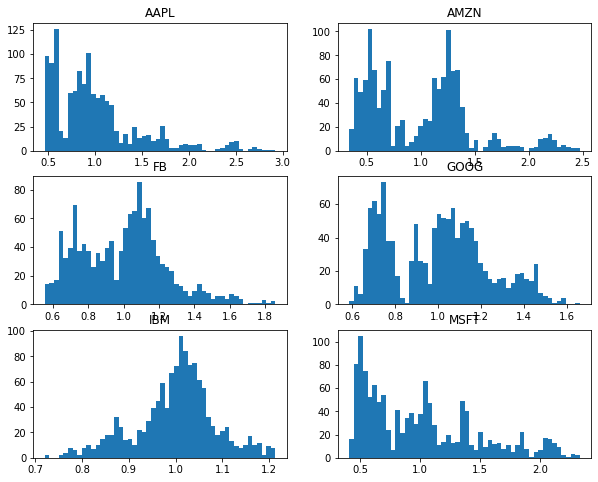

In [39]:
plt.figure(figsize=(10,8))

plt.subplot(3,2,1)
plt.hist(tech_average['AAPL'], bins = 50)
plt.title('AAPL')

plt.subplot(3,2,2)
plt.hist(tech_average['AMZN'], bins = 50)
plt.title('AMZN')

plt.subplot(3,2,3)
plt.hist(tech_average['FB'], bins = 50)
plt.title('FB')

plt.subplot(3,2,4)
plt.hist(tech_average['GOOG'], bins = 50)
plt.title('GOOG')

plt.subplot(3,2,5)
plt.hist(tech_average['IBM'], bins = 50)
plt.title('IBM')

plt.subplot(3,2,6)
plt.hist(tech_average['MSFT'], bins = 50)
plt.title('MSFT')


In [40]:
### Calculating the Normalised value for Tech Stocks
tech_normalised = pd.DataFrame()
tech_normalised['AAPL'] = (tech['AAPL'] /tech.at[0,'AAPL'])
tech_normalised['AMZN'] = (tech['AMZN'] /tech.at[0,'AMZN'])
tech_normalised['FB'] = (tech['FB'] /tech.at[0,'FB'])
tech_normalised['GOOG'] = (tech['GOOG'] /tech.at[0,'GOOG'])
tech_normalised['IBM'] = (tech['IBM'] /tech.at[0,'IBM'])
tech_normalised['MSFT'] = (tech['MSFT'] /tech.at[0,'MSFT'])
tech_normalised['S&P500'] = (tech['S&P500'] /tech.at[0,'S&P500'])
tech_normalised.head()

,AAPL,AMZN,FB,GOOG,IBM,MSFT,S&P500
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007301,1.022699,1.012314,1.025553,1.006895,1.021520,1.014315
2,1.010951,1.044093,1.033645,1.049371,1.037955,1.045282,1.032867
3,1.015787,1.032186,1.020341,1.055866,1.036144,1.047971,1.029161
4,1.010951,1.040751,1.015943,1.050827,1.045268,1.049092,1.037431


Text(0, 0.5, 'Tech_Normalised_Prices')

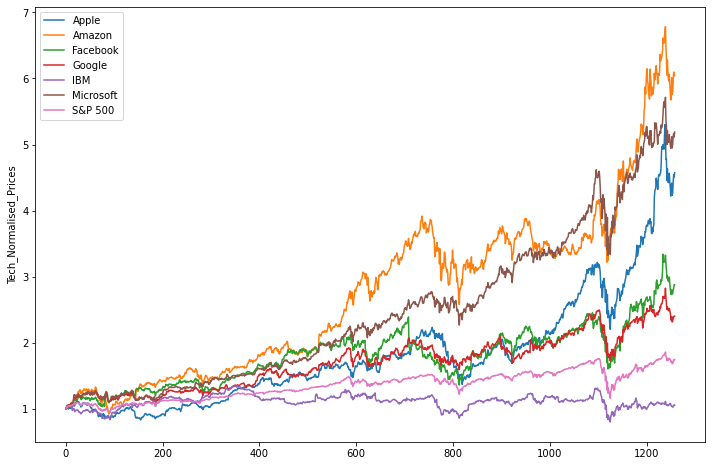

In [41]:
plt.figure(figsize =[12,8])
tech_normalised['AAPL'].plot(label = 'Apple')
tech_normalised['AMZN'].plot(label = 'Amazon')
tech_normalised['FB'].plot(label = 'Facebook')
tech_normalised['GOOG'].plot(label = 'Google')
tech_normalised['IBM'].plot(label = 'IBM')
tech_normalised['MSFT'].plot(label = 'Microsoft')
tech_normalised['S&P500'].plot(label = 'S&P 500')
plt.legend()
plt.ylabel('Tech_Normalised_Prices')

In [42]:
### Calculating the Daily Returns for Tech Stocks
tech_returns = pd.DataFrame()
tech_returns['AAPL'] = (tech['AAPL'] - tech['AAPL'].shift(1))/tech['AAPL'].shift(1)
tech_returns['AMZN'] = (tech['AMZN'] - tech['AMZN'].shift(1))/tech['AMZN'].shift(1)
tech_returns['FB'] = (tech['FB'] - tech['FB'].shift(1))/tech['FB'].shift(1)
tech_returns['GOOG'] = (tech['GOOG'] - tech['GOOG'].shift(1))/tech['GOOG'].shift(1)
tech_returns['IBM'] = (tech['IBM'] - tech['IBM'].shift(1))/tech['IBM'].shift(1)
tech_returns['MSFT'] = (tech['MSFT'] - tech['MSFT'].shift(1))/tech['MSFT'].shift(1)
tech_returns['S&P500'] = (tech['S&P500'] - tech['S&P500'].shift(1))/tech['S&P500'].shift(1)
tech_returns.head()

,AAPL,AMZN,FB,GOOG,IBM,MSFT,S&P500
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.007301,0.022699,0.012314,0.025553,0.006895,0.021520,0.014315
2,0.003624,0.020919,0.021071,0.023225,0.030848,0.023261,0.018290
3,0.004784,-0.011404,-0.012871,0.006189,-0.001744,0.002573,-0.003588
4,-0.004761,0.008298,-0.004310,-0.004772,0.008805,0.001070,0.008036


Text(0, 0.5, 'Tech_Daily_Returns')

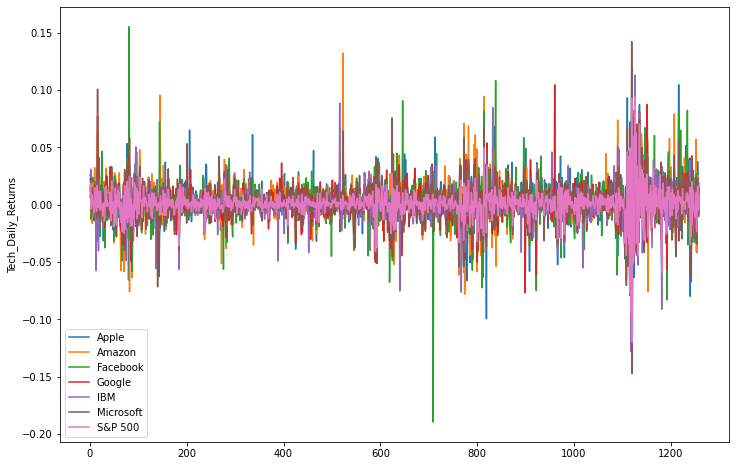

In [43]:
plt.figure(figsize =[12,8])
tech_returns['AAPL'].plot(label = 'Apple')
tech_returns['AMZN'].plot(label = 'Amazon')
tech_returns['FB'].plot(label = 'Facebook')
tech_returns['GOOG'].plot(label = 'Google')
tech_returns['IBM'].plot(label = 'IBM')
tech_returns['MSFT'].plot(label = 'Microsoft')
tech_returns['S&P500'].plot(label = 'S&P 500')
plt.legend()
plt.ylabel('Tech_Daily_Returns')

In [44]:
tech_returns.describe()

,AAPL,AMZN,FB,GOOG,IBM,MSFT,S&P500
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000
mean,0.001385,0.001611,0.001050,0.000834,0.000174,0.001463,0.000517
std,0.018713,0.018969,0.020354,0.016520,0.016023,0.017526,0.012080
min,-0.128647,-0.079221,-0.189609,-0.111008,-0.128507,-0.147390,-0.119841
25%,-0.005919,-0.006716,-0.007223,-0.005788,-0.006227,-0.005851,-0.002938
50%,0.001001,0.001636,0.001193,0.000973,0.000553,0.001301,0.000682
75%,0.010018,0.010765,0.010880,0.008785,0.007004,0.009161,0.005213
max,0.119808,0.132164,0.155214,0.104485,0.113011,0.142169,0.093828


In [45]:
### Calculating the Relative strength for Tech Stocks
tech_strength = pd.DataFrame()
tech_strength['AAPL'] = (tech['AAPL'] /tech.at[0,'S&P500'])
tech_strength['AMZN'] = (tech['AMZN'] /tech.at[0,'S&P500'])
tech_strength['FB'] = (tech['FB'] /tech.at[0,'S&P500'])
tech_strength['GOOG'] = (tech['GOOG'] /tech.at[0,'S&P500'])
tech_strength['IBM'] = (tech['IBM'] /tech.at[0,'S&P500'])
tech_strength['MSFT'] = (tech['MSFT'] /tech.at[0,'S&P500'])
tech_strength.head()

,AAPL,AMZN,FB,GOOG,IBM,MSFT
0,0.013159,0.270670,0.047276,0.317748,0.059770,0.021073
1,0.013255,0.276814,0.047858,0.325867,0.060182,0.021527
2,0.013303,0.282604,0.048866,0.333436,0.062039,0.022028
3,0.013367,0.279382,0.048237,0.335499,0.061930,0.022084
4,0.013303,0.281700,0.048029,0.333898,0.062476,0.022108


Text(0, 0.5, 'Tech_Relative Strength')

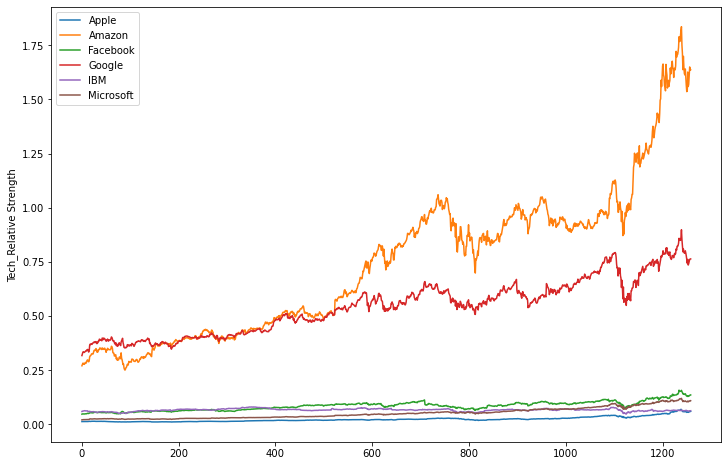

In [46]:
plt.figure(figsize =[12,8])
tech_strength['AAPL'].plot(label = 'Apple')
tech_strength['AMZN'].plot(label = 'Amazon')
tech_strength['FB'].plot(label = 'Facebook')
tech_strength['GOOG'].plot(label = 'Google')
tech_strength['IBM'].plot(label = 'IBM')
tech_strength['MSFT'].plot(label = 'Microsoft')
plt.legend()
plt.ylabel('Tech_Relative Strength')

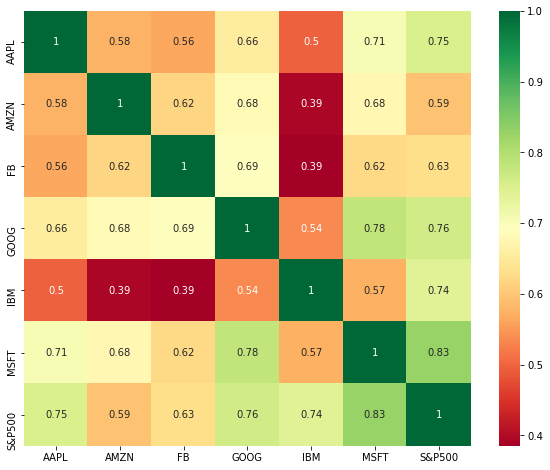

In [47]:
#determining the correlation of Numerical variable in the data set
tech_returns.corr()
#Plotting the correlation of Numerical variable in the data set
plt.figure(figsize = (10,8))        # Size of the figure
sns.heatmap(tech_returns.corr(),annot = True,cmap = 'RdYlGn')
plt.show()

Strong Positive Correlation (0.7 to 1): Apple, Google, IBM, Microsoft 

Weak Positive Correlation (below 0.7): Amazon, Facebook

Recommendation : When the market index is rising the Higher Positive correleation stocks should be prefered for investment

In [48]:
### Calculating the Average spread for Aviation Stocks for visualising stock price dispersion by histogram
aviation_average = pd.DataFrame()
aviation_average['AAL'] = (aviation['AAL'] /aviation['AAL'].mean())
aviation_average['ALGT'] = (aviation['ALGT'] /aviation['ALGT'].mean())
aviation_average['ALK'] = (aviation['ALK'] /aviation['ALK'].mean())
aviation_average['DAL'] = (aviation['DAL'] /aviation['DAL'].mean())
aviation_average['HA'] = (aviation['HA'] /aviation['HA'].mean())
aviation_average['LUV'] = (aviation['LUV'] /aviation['LUV'].mean())
aviation_average.head()

,AAL,ALGT,ALK,DAL,HA,LUV
0,1.053560,1.434801,1.154449,0.897012,0.695030,0.758473
1,1.038241,1.419069,1.140491,0.886345,0.682383,0.757881
2,1.080168,1.422163,1.164233,0.927630,0.716671,0.776048
3,1.024802,1.373060,1.072430,0.890691,0.681540,0.750377
4,1.056517,1.407551,1.093150,0.908469,0.690252,0.764398


Text(0.5, 1.0, 'LUV')

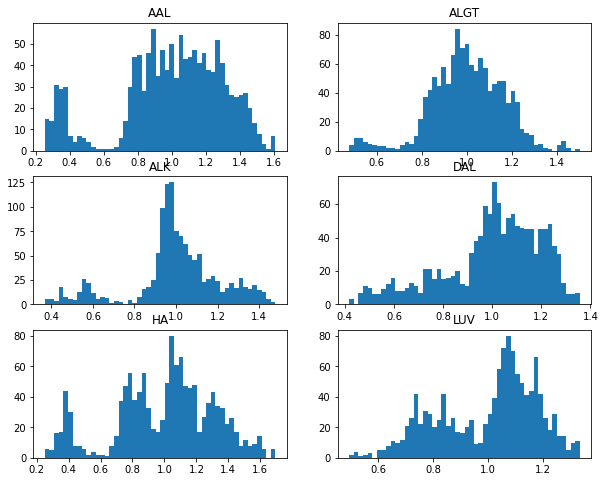

In [49]:
plt.figure(figsize=(10,8))

plt.subplot(3,2,1)
plt.hist(aviation_average['AAL'], bins = 50)
plt.title('AAL')

plt.subplot(3,2,2)
plt.hist(aviation_average['ALGT'], bins = 50)
plt.title('ALGT')

plt.subplot(3,2,3)
plt.hist(aviation_average['ALK'], bins = 50)
plt.title('ALK')

plt.subplot(3,2,4)
plt.hist(aviation_average['DAL'], bins = 50)
plt.title('DAL')

plt.subplot(3,2,5)
plt.hist(aviation_average['HA'], bins = 50)
plt.title('HA')

plt.subplot(3,2,6)
plt.hist(aviation_average['LUV'], bins = 50)
plt.title('LUV')


In [50]:
### Calculating the Normalised value for Aviation Stocks
aviation_normalised = pd.DataFrame()
aviation_normalised['AAL'] = (aviation['AAL'] /aviation.at[0,'AAL'])
aviation_normalised['ALGT'] = (aviation['ALGT'] /aviation.at[0,'ALGT'])
aviation_normalised['ALK'] = (aviation['ALK'] /aviation.at[0,'ALK'])
aviation_normalised['DAL'] = (aviation['DAL'] /aviation.at[0,'DAL'])
aviation_normalised['HA'] = (aviation['HA'] /aviation.at[0,'HA'])
aviation_normalised['LUV'] = (aviation['LUV'] /aviation.at[0,'LUV'])
aviation_normalised['S&P500'] = (aviation['S&P500'] /aviation.at[0,'S&P500'])
aviation_normalised.head()

,AAL,ALGT,ALK,DAL,HA,LUV,S&P500
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.985460,0.989036,0.987910,0.988108,0.981804,0.999219,1.014315
2,1.025255,0.991192,1.008476,1.034133,1.031136,1.023171,1.032867
3,0.972704,0.956969,0.928954,0.992953,0.980591,0.989326,1.029161
4,1.002807,0.981008,0.946902,1.012772,0.993126,1.007811,1.037431


Text(0, 0.5, 'Aviation_Normalised_Prices')

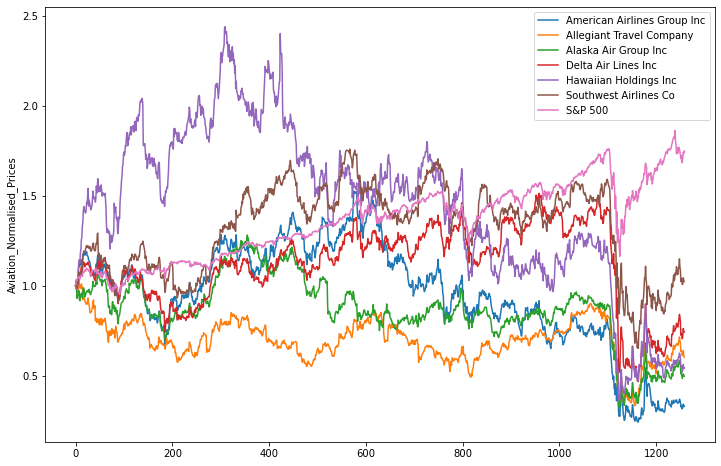

In [51]:
plt.figure(figsize =[12,8])
aviation_normalised['AAL'].plot(label = 'American Airlines Group Inc')
aviation_normalised['ALGT'].plot(label = 'Allegiant Travel Company')
aviation_normalised['ALK'].plot(label = 'Alaska Air Group Inc')
aviation_normalised['DAL'].plot(label = 'Delta Air Lines Inc')
aviation_normalised['HA'].plot(label = 'Hawaiian Holdings Inc')
aviation_normalised['LUV'].plot(label = 'Southwest Airlines Co')
aviation_normalised['S&P500'].plot(label = 'S&P 500')
plt.legend()
plt.ylabel('Aviation_Normalised_Prices')

In [52]:
### Calculating the Daily Returns for Aviation Stocks
aviation_returns = pd.DataFrame()
aviation_returns['AAL'] = (aviation['AAL'] - aviation['AAL'].shift(1))/aviation['AAL'].shift(1)
aviation_returns['ALGT'] = (aviation['ALGT'] - aviation['ALGT'].shift(1))/aviation['ALGT'].shift(1)
aviation_returns['ALK'] = (aviation['ALK'] - aviation['ALK'].shift(1))/aviation['ALK'].shift(1)
aviation_returns['DAL'] = (aviation['DAL'] - aviation['DAL'].shift(1))/aviation['DAL'].shift(1)
aviation_returns['HA'] = (aviation['HA'] - aviation['HA'].shift(1))/aviation['HA'].shift(1)
aviation_returns['LUV'] = (aviation['LUV'] - aviation['LUV'].shift(1))/aviation['LUV'].shift(1)
aviation_returns['S&P500'] = (aviation['S&P500'] - aviation['S&P500'].shift(1))/aviation['S&P500'].shift(1)
aviation_returns.head()

,AAL,ALGT,ALK,DAL,HA,LUV,S&P500
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.014540,-0.010964,-0.012090,-0.011892,-0.018196,-0.000781,0.014315
2,0.040383,0.002180,0.020817,0.046579,0.050247,0.023971,0.018290
3,-0.051257,-0.034527,-0.078853,-0.039821,-0.049019,-0.033078,-0.003588
4,0.030947,0.025120,0.019321,0.019960,0.012783,0.018684,0.008036


Text(0, 0.5, 'Aviation_Daily_Returns')

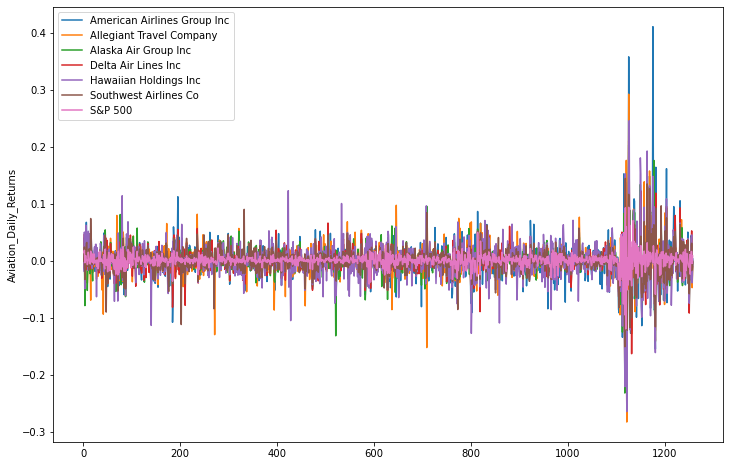

In [53]:
plt.figure(figsize =[12,8])
aviation_returns['AAL'].plot(label = 'American Airlines Group Inc')
aviation_returns['ALGT'].plot(label = 'Allegiant Travel Company')
aviation_returns['ALK'].plot(label = 'Alaska Air Group Inc')
aviation_returns['DAL'].plot(label = 'Delta Air Lines Inc')
aviation_returns['HA'].plot(label = 'Hawaiian Holdings Inc')
aviation_returns['LUV'].plot(label = 'Southwest Airlines Co')
aviation_returns['S&P500'].plot(label = 'S&P 500')
plt.legend()
plt.ylabel('Aviation_Daily_Returns')

In [54]:
aviation_returns.describe()

,AAL,ALGT,ALK,DAL,HA,LUV,S&P500
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000
mean,-0.000298,0.000025,-0.000189,0.000120,0.000064,0.000281,0.000517
std,0.034723,0.029107,0.026910,0.026473,0.033131,0.022900,0.012080
min,-0.252246,-0.283300,-0.232385,-0.259924,-0.264971,-0.151094,-0.119841
25%,-0.013547,-0.011278,-0.010721,-0.009509,-0.014844,-0.008918,-0.002938
50%,-0.000430,-0.000340,0.000492,0.000801,0.000342,0.000618,0.000682
75%,0.013233,0.011630,0.010619,0.009956,0.015078,0.009990,0.005213
max,0.410970,0.292428,0.203079,0.210171,0.245837,0.144441,0.093828


In [55]:
### Calculating the Relative strength for Aviation Stocks
aviation_strength = pd.DataFrame()
aviation_strength['AAL'] = (aviation['AAL'] /aviation.at[0,'S&P500'])
aviation_strength['ALGT'] = (aviation['ALGT'] /aviation.at[0,'S&P500'])
aviation_strength['ALK'] = (aviation['ALK'] /aviation.at[0,'S&P500'])
aviation_strength['DAL'] = (aviation['DAL'] /aviation.at[0,'S&P500'])
aviation_strength['HA'] = (aviation['HA'] /aviation.at[0,'S&P500'])
aviation_strength['LUV'] = (aviation['LUV'] /aviation.at[0,'S&P500'])
aviation_strength.head()

,AAL,ALGT,ALK,DAL,HA,LUV
0,0.019430,0.103465,0.038342,0.021396,0.012386,0.019058
1,0.019148,0.102331,0.037878,0.021142,0.012160,0.019043
2,0.019921,0.102554,0.038667,0.022127,0.012771,0.019500
3,0.018900,0.099013,0.035618,0.021245,0.012145,0.018855
4,0.019485,0.101500,0.036306,0.021669,0.012300,0.019207


Text(0, 0.5, 'Aviation_Relative Strength')

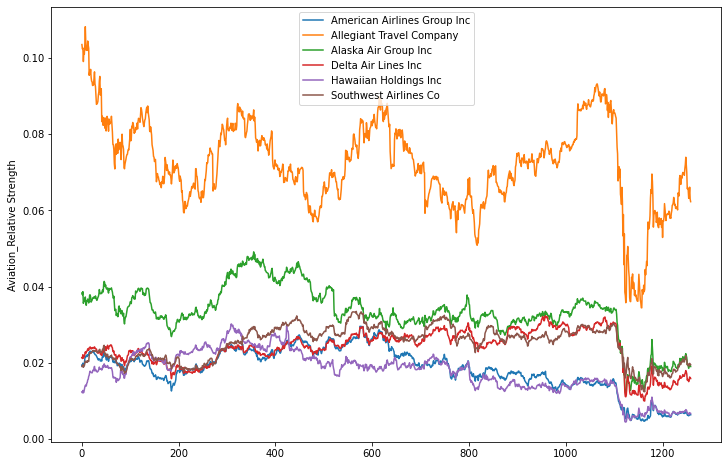

In [56]:
plt.figure(figsize =[12,8])
aviation_strength['AAL'].plot(label = 'American Airlines Group Inc')
aviation_strength['ALGT'].plot(label = 'Allegiant Travel Company')
aviation_strength['ALK'].plot(label = 'Alaska Air Group Inc')
aviation_strength['DAL'].plot(label = 'Delta Air Lines Inc')
aviation_strength['HA'].plot(label = 'Hawaiian Holdings Inc')
aviation_strength['LUV'].plot(label = 'Southwest Airlines Co')
plt.legend()
plt.ylabel('Aviation_Relative Strength')

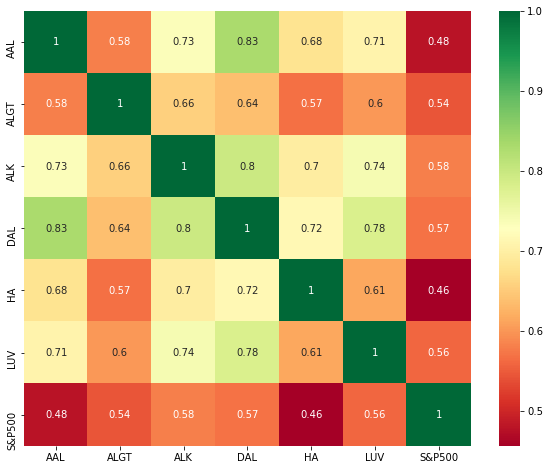

In [57]:
#determining the correlation of Numerical variable in the data set
aviation_returns.corr()
#Plotting the correlation of Numerical variable in the data set
plt.figure(figsize = (10,8))        # Size of the figure
sns.heatmap(aviation_returns.corr(),annot = True,cmap = 'RdYlGn')
plt.show()

Weak Positive Correlation (0 to 0.55): American Airlines, Hawaiian Holdings, Allegiant Travel Company, Alaska Air

Recommendation : When the market index is rising the Weak Positive correleation stocks could be prefered for investment. 
However the aviation sector is not recommended considering the weak correlation with S&P500

In [58]:
### Calculating the Average spread for Finance Stocks for visualising stock price dispersion by histogram
finance_average = pd.DataFrame()
finance_average['BCS'] = (finance['BCS'] /finance['BCS'].mean())
finance_average['CS'] = (finance['CS'] /finance['CS'].mean())
finance_average['DB'] = (finance['DB'] /finance['DB'].mean())
finance_average['GS'] = (finance['GS'] /finance['GS'].mean())
finance_average['MS'] = (finance['MS'] /finance['MS'].mean())
finance_average['WFC'] = (finance['WFC'] /finance['WFC'].mean())
finance_average.head()

,BCS,CS,DB,GS,MS,WFC
0,1.520160,1.494626,1.926867,0.817422,0.694378,0.974340
1,1.558645,1.528750,1.971915,0.822019,0.692835,0.970930
2,1.579913,1.561012,2.048932,0.839155,0.711792,0.992713
3,1.574849,1.574662,2.063463,0.837391,0.713335,0.985515
4,1.593079,1.570939,2.091799,0.846261,0.725900,0.988546


Text(0.5, 1.0, 'WFC')

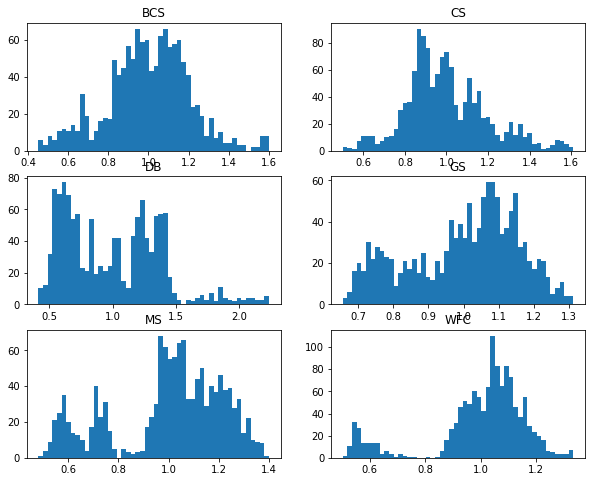

In [59]:
plt.figure(figsize=(10,8))

plt.subplot(3,2,1)
plt.hist(finance_average['BCS'], bins = 50)
plt.title('BCS')

plt.subplot(3,2,2)
plt.hist(finance_average['CS'], bins = 50)
plt.title('CS')

plt.subplot(3,2,3)
plt.hist(finance_average['DB'], bins = 50)
plt.title('DB')

plt.subplot(3,2,4)
plt.hist(finance_average['GS'], bins = 50)
plt.title('GS')

plt.subplot(3,2,5)
plt.hist(finance_average['MS'], bins = 50)
plt.title('MS')

plt.subplot(3,2,6)
plt.hist(finance_average['WFC'], bins = 50)
plt.title('WFC')


In [60]:
### Calculating the Normalised value for Finance Stocks
finance_normalised = pd.DataFrame()
finance_normalised['BCS'] = (finance['BCS'] /finance.at[0,'BCS'])
finance_normalised['CS'] = (finance['CS'] /finance.at[0,'CS'])
finance_normalised['DB'] = (finance['DB'] /finance.at[0,'DB'])
finance_normalised['GS'] = (finance['GS'] /finance.at[0,'GS'])
finance_normalised['MS'] = (finance['MS'] /finance.at[0,'MS'])
finance_normalised['WFC'] = (finance['WFC'] /finance.at[0,'WFC'])
finance_normalised['S&P500'] = (finance['S&P500'] /finance.at[0,'S&P500'])
finance_normalised.head()

,BCS,CS,DB,GS,MS,WFC,S&P500
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.025316,1.022831,1.023379,1.005624,0.997778,0.996501,1.014315
2,1.039307,1.044417,1.063349,1.026588,1.025079,1.018857,1.032867
3,1.035976,1.053549,1.070890,1.024429,1.027302,1.011470,1.029161
4,1.047968,1.051059,1.085596,1.035280,1.045397,1.014580,1.037431


Text(0, 0.5, 'Finance_Normalised_Prices')

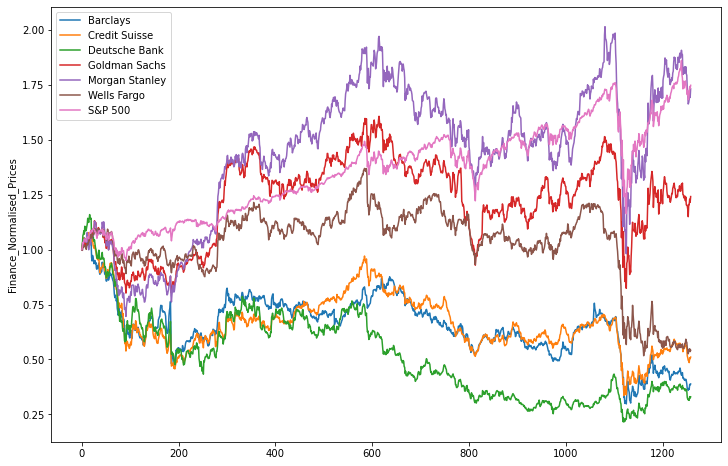

In [61]:
plt.figure(figsize =[12,8])
finance_normalised['BCS'].plot(label = 'Barclays')
finance_normalised['CS'].plot(label = 'Credit Suisse')
finance_normalised['DB'].plot(label = 'Deutsche Bank')
finance_normalised['GS'].plot(label = 'Goldman Sachs')
finance_normalised['MS'].plot(label = 'Morgan Stanley')
finance_normalised['WFC'].plot(label = 'Wells Fargo ')
finance_normalised['S&P500'].plot(label = 'S&P 500')
plt.legend()
plt.ylabel('Finance_Normalised_Prices')

In [62]:
### Calculating the Daily Returns for Finance Stocks
finance_returns = pd.DataFrame()
finance_returns['BCS'] = (finance['BCS'] - finance['BCS'].shift(1))/finance['BCS'].shift(1)
finance_returns['CS'] = (finance['CS'] - finance['CS'].shift(1))/finance['CS'].shift(1)
finance_returns['DB'] = (finance['DB'] - finance['DB'].shift(1))/finance['DB'].shift(1)
finance_returns['GS'] = (finance['GS'] - finance['GS'].shift(1))/finance['GS'].shift(1)
finance_returns['MS'] = (finance['MS'] - finance['MS'].shift(1))/finance['MS'].shift(1)
finance_returns['WFC'] = (finance['WFC'] - finance['WFC'].shift(1))/finance['WFC'].shift(1)
finance_returns['S&P500'] = (finance['S&P500'] - finance['S&P500'].shift(1))/finance['S&P500'].shift(1)
finance_returns.head()

,BCS,CS,DB,GS,MS,WFC,S&P500
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.025316,0.022831,0.023379,0.005624,-0.002222,-0.003499,0.014315
2,0.013645,0.021104,0.039057,0.020846,0.027362,0.022435,0.018290
3,-0.003205,0.008744,0.007092,-0.002103,0.002168,-0.007251,-0.003588
4,0.011575,-0.002364,0.013732,0.010592,0.017614,0.003075,0.008036


Text(0, 0.5, 'Finance_Daily_Returns')

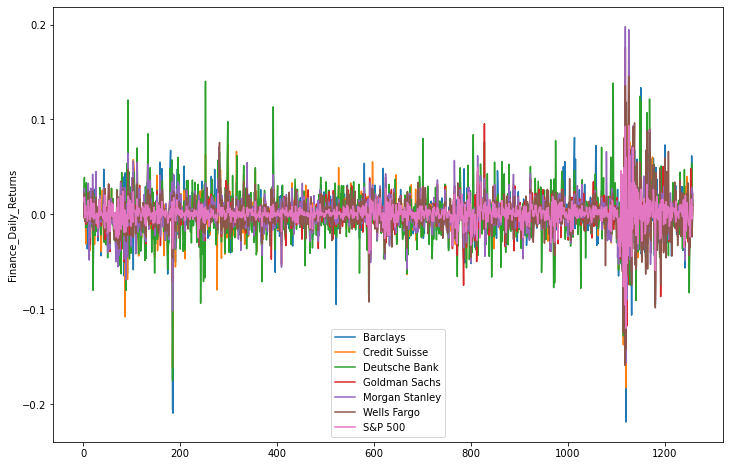

In [63]:
plt.figure(figsize =[12,8])
finance_returns['BCS'].plot(label = 'Barclays')
finance_returns['CS'].plot(label = 'Credit Suisse')
finance_returns['DB'].plot(label = 'Deutsche Bank')
finance_returns['GS'].plot(label = 'Goldman Sachs')
finance_returns['MS'].plot(label = 'Morgan Stanley')
finance_returns['WFC'].plot(label = 'Wells Fargo ')
finance_returns['S&P500'].plot(label = 'S&P 500')
plt.legend()
plt.ylabel('Finance_Daily_Returns')

In [64]:
finance_returns.describe()

,BCS,CS,DB,GS,MS,WFC,S&P500
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000
mean,-0.000431,-0.000271,-0.000498,0.000370,0.000674,-0.000280,0.000517
std,0.025029,0.022788,0.027749,0.019887,0.021813,0.020331,0.012080
min,-0.218519,-0.182598,-0.174888,-0.127053,-0.156000,-0.158676,-0.119841
25%,-0.010690,-0.010309,-0.014936,-0.008323,-0.008882,-0.007852,-0.002938
50%,0.000000,0.000000,-0.001044,0.000369,0.000614,-0.000184,0.000682
75%,0.010215,0.010425,0.013872,0.009771,0.010752,0.007641,0.005213
max,0.151042,0.163447,0.140244,0.175803,0.197700,0.145347,0.093828


In [65]:
### Calculating the Relative strength for Finance Stocks
finance_strength = pd.DataFrame()
finance_strength['BCS'] = (finance['BCS'] /finance.at[0,'S&P500'])
finance_strength['CS'] = (finance['CS'] /finance.at[0,'S&P500'])
finance_strength['DB'] = (finance['DB'] /finance.at[0,'S&P500'])
finance_strength['GS'] = (finance['GS'] /finance.at[0,'S&P500'])
finance_strength['MS'] = (finance['MS'] /finance.at[0,'S&P500'])
finance_strength['WFC'] = (finance['WFC'] /finance.at[0,'S&P500'])
finance_strength.head()

,BCS,CS,DB,GS,MS,WFC
0,0.006713,0.010151,0.013256,0.084139,0.014509,0.022571
1,0.006883,0.010383,0.013566,0.084613,0.014476,0.022492
2,0.006977,0.010602,0.014096,0.086376,0.014872,0.022997
3,0.006954,0.010694,0.014196,0.086195,0.014905,0.022830
4,0.007035,0.010669,0.014391,0.087108,0.015167,0.022900


Text(0, 0.5, 'Finance_Relative Strength')

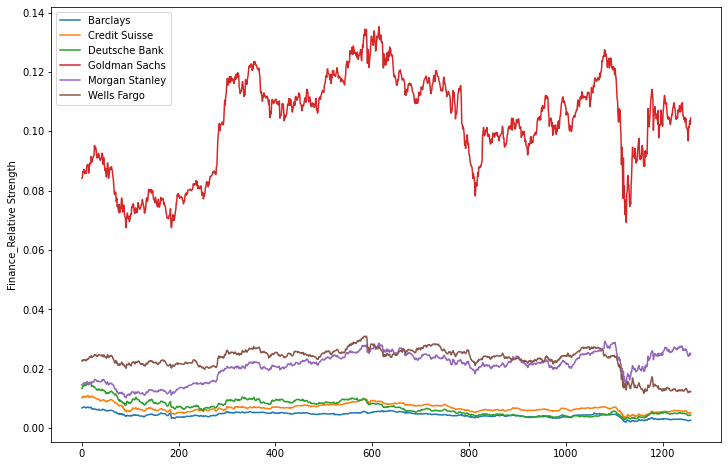

In [66]:
plt.figure(figsize =[12,8])
finance_strength['BCS'].plot(label = 'Barclays')
finance_strength['CS'].plot(label = 'Credit Suisse')
finance_strength['DB'].plot(label = 'Deutsche Bank')
finance_strength['GS'].plot(label = 'Goldman Sachs')
finance_strength['MS'].plot(label = 'Morgan Stanley')
finance_strength['WFC'].plot(label = 'Wells Fargo ')
plt.legend()
plt.ylabel('Finance_Relative Strength')

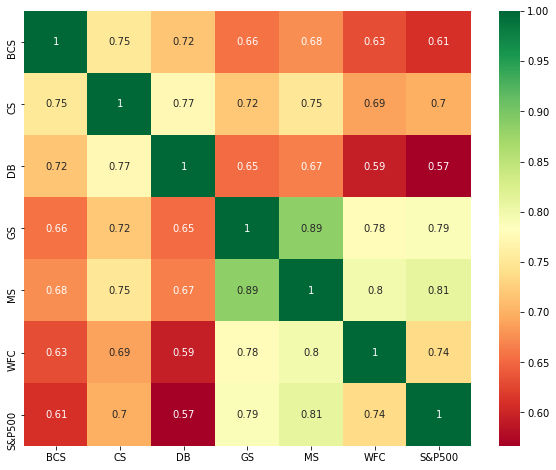

In [67]:
#determining the correlation of Numerical variable in the data set
finance_returns.corr()
#Plotting the correlation of Numerical variable in the data set
plt.figure(figsize = (10,8))        # Size of the figure
sns.heatmap(finance_returns.corr(),annot = True,cmap = 'RdYlGn')
plt.show()

Strong Positive Correlation (0.7 to 1): Morgan Stanley, Goldman Sachs, Wells Fargo, Credit Suisse

Weak Positive Correlation (0 to 0.7): Barclays, Deutsche Bank

Recommendation : When the market index is rising the Strong Positive correleation stocks should be prefered for investment

In [68]:
### Calculating the Average spread for Healthcare Stocks for visualising stock price dispersion by histogram
healthcare_average = pd.DataFrame()
healthcare_average['JNJ'] = (healthcare['JNJ'] /healthcare['JNJ'].mean())
healthcare_average['MRK'] = (healthcare['MRK'] /healthcare['MRK'].mean())
healthcare_average['PFE'] = (healthcare['PFE'] /healthcare['PFE'].mean())
healthcare_average['UNH'] = (healthcare['UNH'] /healthcare['UNH'].mean())
healthcare_average['BHC'] = (healthcare['BHC'] /healthcare['BHC'].mean())
healthcare_average['RHHBY'] = (healthcare['RHHBY'] /healthcare['RHHBY'].mean())
healthcare_average.head()

,JNJ,MRK,PFE,UNH,BHC,RHHBY
0,0.672028,0.668341,0.795839,0.523113,6.444703,0.906568
1,0.677510,0.678765,0.826833,0.533072,6.542307,0.909297
2,0.683497,0.693520,0.836831,0.536751,5.865541,0.912572
3,0.673831,0.674162,0.819585,0.520601,5.956685,0.915028
4,0.685084,0.689730,0.832082,0.522306,6.094120,0.888284


Text(0.5, 1.0, 'RHHBY')

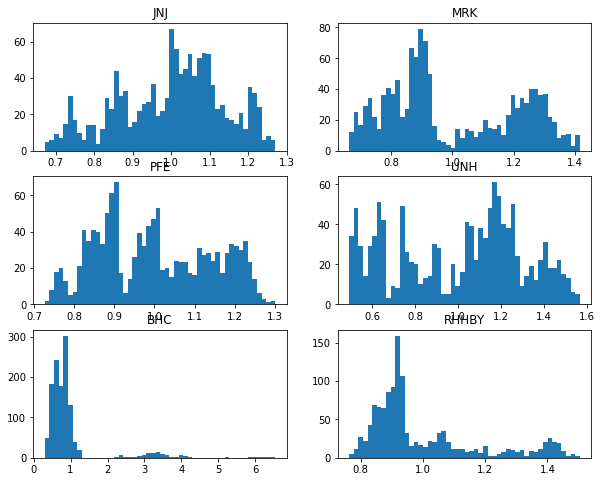

In [69]:
plt.figure(figsize=(10,8))

plt.subplot(3,2,1)
plt.hist(healthcare_average['JNJ'], bins = 50)
plt.title('JNJ')

plt.subplot(3,2,2)
plt.hist(healthcare_average['MRK'], bins = 50)
plt.title('MRK')

plt.subplot(3,2,3)
plt.hist(healthcare_average['PFE'], bins = 50)
plt.title('PFE')

plt.subplot(3,2,4)
plt.hist(healthcare_average['UNH'], bins = 50)
plt.title('UNH')

plt.subplot(3,2,5)
plt.hist(healthcare_average['BHC'], bins = 50)
plt.title('BHC')

plt.subplot(3,2,6)
plt.hist(healthcare_average['RHHBY'], bins = 50)
plt.title('RHHBY')


In [70]:
### Calculating the Normalised value for Healthcare Stocks
healthcare_normalised = pd.DataFrame()
healthcare_normalised['JNJ'] = (healthcare['JNJ'] /healthcare.at[0,'JNJ'])
healthcare_normalised['MRK'] = (healthcare['MRK'] /healthcare.at[0,'MRK'])
healthcare_normalised['PFE'] = (healthcare['PFE'] /healthcare.at[0,'PFE'])
healthcare_normalised['UNH'] = (healthcare['UNH'] /healthcare.at[0,'UNH'])
healthcare_normalised['BHC'] = (healthcare['BHC'] /healthcare.at[0,'BHC'])
healthcare_normalised['RHHBY'] = (healthcare['RHHBY'] /healthcare.at[0,'RHHBY'])
healthcare_normalised['S&P500'] = (healthcare['S&P500'] /healthcare.at[0,'S&P500'])
healthcare_normalised.head()

,JNJ,MRK,PFE,UNH,BHC,RHHBY,S&P500
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008157,1.015597,1.038945,1.019038,1.015145,1.003010,1.014315
2,1.017066,1.037675,1.051508,1.026070,0.910134,1.006622,1.032867
3,1.002683,1.008710,1.029837,0.995198,0.924276,1.009332,1.029161
4,1.019427,1.032003,1.045540,0.998456,0.945601,0.979831,1.037431


Text(0, 0.5, 'Healthcare_Normalised_Prices')

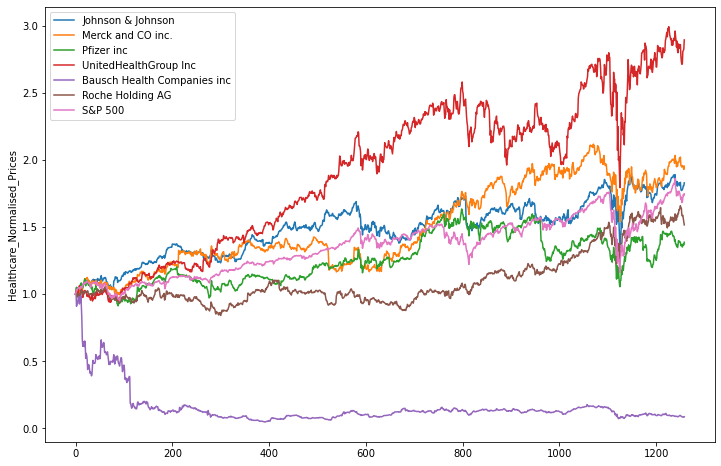

In [71]:
plt.figure(figsize =[12,8])
healthcare_normalised['JNJ'].plot(label = 'Johnson & Johnson')
healthcare_normalised['MRK'].plot(label = 'Merck and CO inc.')
healthcare_normalised['PFE'].plot(label = 'Pfizer inc')
healthcare_normalised['UNH'].plot(label = 'UnitedHealthGroup Inc')
healthcare_normalised['BHC'].plot(label = 'Bausch Health Companies inc')
healthcare_normalised['RHHBY'].plot(label = 'Roche Holding AG')
healthcare_normalised['S&P500'].plot(label = 'S&P 500')
plt.legend()
plt.ylabel('Healthcare_Normalised_Prices')

In [72]:
### Calculating the Daily Returns for Healthcare Stocks
healthcare_returns = pd.DataFrame()
healthcare_returns['JNJ'] = (healthcare['JNJ'] - healthcare['JNJ'].shift(1))/healthcare['JNJ'].shift(1)
healthcare_returns['MRK'] = (healthcare['MRK'] - healthcare['MRK'].shift(1))/healthcare['MRK'].shift(1)
healthcare_returns['PFE'] = (healthcare['PFE'] - healthcare['PFE'].shift(1))/healthcare['PFE'].shift(1)
healthcare_returns['UNH'] = (healthcare['UNH'] - healthcare['UNH'].shift(1))/healthcare['UNH'].shift(1)
healthcare_returns['BHC'] = (healthcare['BHC'] - healthcare['BHC'].shift(1))/healthcare['BHC'].shift(1)
healthcare_returns['RHHBY'] = (healthcare['RHHBY'] - healthcare['RHHBY'].shift(1))/healthcare['RHHBY'].shift(1)
healthcare_returns['S&P500'] = (healthcare['S&P500'] - healthcare['S&P500'].shift(1))/healthcare['S&P500'].shift(1)
healthcare_returns.head()

,JNJ,MRK,PFE,UNH,BHC,RHHBY,S&P500
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.008157,0.015597,0.038945,0.019038,0.015145,0.003010,0.014315
2,0.008836,0.021739,0.012092,0.006901,-0.103444,0.003601,0.018290
3,-0.014141,-0.027913,-0.020609,-0.030088,0.015539,0.002691,-0.003588
4,0.016699,0.023092,0.015249,0.003275,0.023072,-0.029228,0.008036


Text(0, 0.5, 'Healthcare_Daily_Returns')

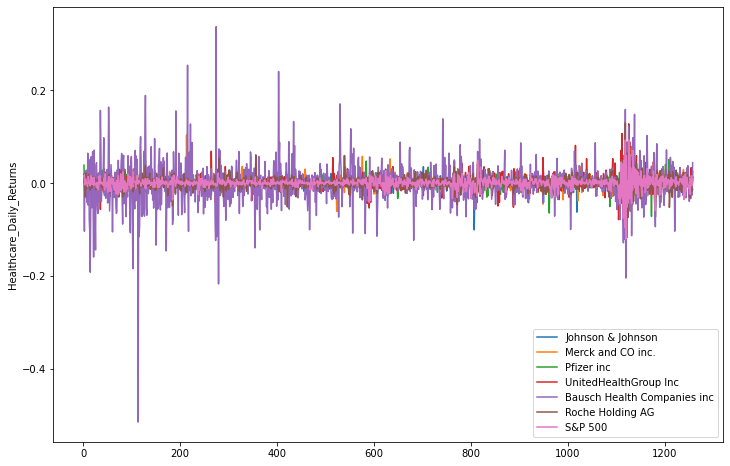

In [73]:
plt.figure(figsize =[12,8])
healthcare_returns['JNJ'].plot(label = 'Johnson & Johnson')
healthcare_returns['MRK'].plot(label = 'Merck and CO inc.')
healthcare_returns['PFE'].plot(label = 'Pfizer inc')
healthcare_returns['UNH'].plot(label = 'UnitedHealthGroup Inc')
healthcare_returns['BHC'].plot(label = 'Bausch Health Companies inc')
healthcare_returns['RHHBY'].plot(label = 'Roche Holding AG')
healthcare_returns['S&P500'].plot(label = 'S&P 500')
plt.legend()
plt.ylabel('Healthcare_Daily_Returns')

In [74]:
healthcare_returns.describe()

,JNJ,MRK,PFE,UNH,BHC,RHHBY,S&P500
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000
mean,0.000558,0.000631,0.000355,0.001005,-0.000897,0.000422,0.000517
std,0.012441,0.014021,0.013743,0.017834,0.044551,0.013492,0.012080
min,-0.100379,-0.088990,-0.077346,-0.172769,-0.514629,-0.089609,-0.119841
25%,-0.004177,-0.006024,-0.005591,-0.006587,-0.019678,-0.005997,-0.002938
50%,0.000632,0.000381,0.000278,0.000864,-0.000501,0.000293,0.000682
75%,0.005945,0.007654,0.006414,0.008271,0.018022,0.006933,0.005213
max,0.079977,0.104080,0.089607,0.127989,0.337444,0.130118,0.093828


In [75]:
### Calculating the Relative strength for Healthcare Stocks
healthcare_strength = pd.DataFrame()
healthcare_strength['JNJ'] = (healthcare['JNJ'] /healthcare.at[0,'S&P500'])
healthcare_strength['MRK'] = (healthcare['MRK'] /healthcare.at[0,'S&P500'])
healthcare_strength['PFE'] = (healthcare['PFE'] /healthcare.at[0,'S&P500'])
healthcare_strength['UNH'] = (healthcare['UNH'] /healthcare.at[0,'S&P500'])
healthcare_strength['BHC'] = (healthcare['BHC'] /healthcare.at[0,'S&P500'])
healthcare_strength['RHHBY'] = (healthcare['RHHBY'] /healthcare.at[0,'S&P500'])
healthcare_strength.head()

,JNJ,MRK,PFE,UNH,BHC,RHHBY
0,0.042300,0.022065,0.013754,0.055984,0.093356,0.014676
1,0.042645,0.022409,0.014289,0.057050,0.094770,0.014720
2,0.043022,0.022896,0.014462,0.057444,0.084966,0.014773
3,0.042413,0.022257,0.014164,0.055715,0.086287,0.014813
4,0.043122,0.022771,0.014380,0.055898,0.088277,0.014380


Text(0, 0.5, 'Healthcare_Relative Strength')

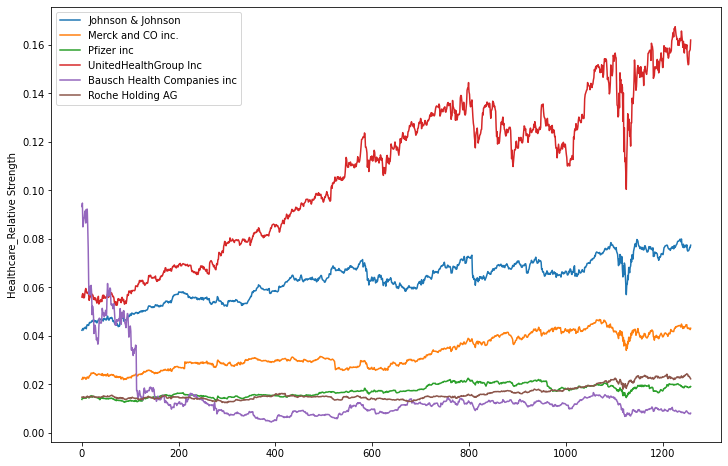

In [76]:
plt.figure(figsize =[12,8])
healthcare_strength['JNJ'].plot(label = 'Johnson & Johnson')
healthcare_strength['MRK'].plot(label = 'Merck and CO inc.')
healthcare_strength['PFE'].plot(label = 'Pfizer inc')
healthcare_strength['UNH'].plot(label = 'UnitedHealthGroup Inc')
healthcare_strength['BHC'].plot(label = 'Bausch Health Companies inc')
healthcare_strength['RHHBY'].plot(label = 'Roche Holding AG')
plt.legend()
plt.ylabel('Healthcare_Relative Strength')

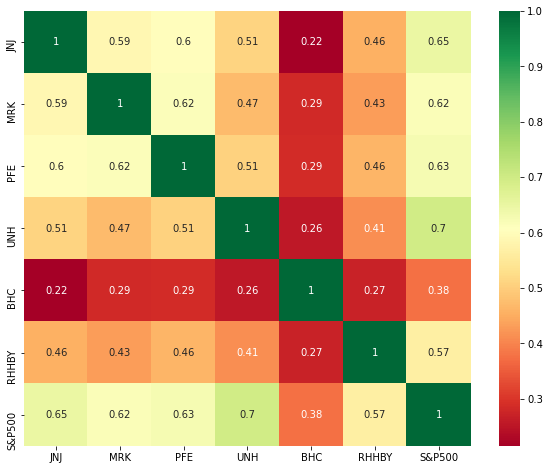

In [77]:
#determining the correlation of Numerical variable in the data set
healthcare_returns.corr()
#Plotting the correlation of Numerical variable in the data set
plt.figure(figsize = (10,8))        # Size of the figure
sns.heatmap(healthcare_returns.corr(),annot = True,cmap = 'RdYlGn')
plt.show()

Strong Positive Correlation (0.6 to 1): UnitedhealthGroup Inc, J&J, Pfizer Inc, Merck & Co

Weak Positive Correlation (0.6 & below): Bausch Health Companies inc, Roche Holding AG

Recommendation : When the market index is rising the Strong Positive correleation stocks should be prefered for investment

In [78]:
#### Exporting normalised close values for tableau dashboard

aal =pd.DataFrame()
aal['Norm_Close'] = (aviation['AAL'] /aviation.at[0,'AAL'])
aal['Co'] = "American Airlines Group Inc"
aal['Date'] = dates['Date']
aal['Sector'] = "Aviation"

algt =pd.DataFrame()
algt['Norm_Close'] = (aviation['ALGT'] /aviation.at[0,'ALGT'])
algt['Co'] = "Allegiant Travel Company"
algt['Date'] = dates['Date']
algt['Sector'] = "Aviation"

alk =pd.DataFrame()
alk['Norm_Close'] = (aviation['ALK'] /aviation.at[0,'ALK'])
alk['Co'] = "Alaska Air Group Inc"
alk['Date'] = dates['Date']
alk['Sector'] = "Aviation"

dal =pd.DataFrame()
dal['Norm_Close'] = (aviation['DAL'] /aviation.at[0,'DAL'])
dal['Co'] = "Delta Air Lines Inc"
dal['Date'] = dates['Date']
dal['Sector'] = "Aviation"

ha =pd.DataFrame()
ha['Norm_Close'] = (aviation['HA'] /aviation.at[0,'HA'])
ha['Co'] = "Hawaiian Holdings Inc"
ha['Date'] = dates['Date']
ha['Sector'] = "Aviation"

luv =pd.DataFrame()
luv['Norm_Close'] = (aviation['LUV'] /aviation.at[0,'LUV'])
luv['Co'] = "Southwest Airlines Co"
luv['Date'] = dates['Date']
luv['Sector'] = "Aviation"

bcs =pd.DataFrame()
bcs['Norm_Close'] = (finance['BCS'] /finance.at[0,'BCS'])
bcs['Co'] = "Barclays"
bcs['Date'] = dates['Date']
bcs['Sector'] = "Finance"

cs =pd.DataFrame()
cs['Norm_Close'] = (finance['CS'] /finance.at[0,'CS'])
cs['Co'] = "Credit Suisse"
cs['Date'] = dates['Date']
cs['Sector'] = "Finance"

db =pd.DataFrame()
db['Norm_Close'] = (finance['DB'] /finance.at[0,'DB'])
db['Co'] = "Deutsche Bank"
db['Date'] = dates['Date']
db['Sector'] = "Finance"

gs =pd.DataFrame()
gs['Norm_Close'] = (finance['GS'] /finance.at[0,'GS'])
gs['Co'] = "Goldman Sachs"
gs['Date'] = dates['Date']
gs['Sector'] = "Finance"

ms =pd.DataFrame()
ms['Norm_Close'] = (finance['MS'] /finance.at[0,'MS'])
ms['Co'] = "Morgan Stanley"
ms['Date'] = dates['Date']
ms['Sector'] = "Finance"

wfc =pd.DataFrame()
wfc['Norm_Close'] = (finance['WFC'] /finance.at[0,'WFC'])
wfc['Co'] = "Wells Fargo"
wfc['Date'] = dates['Date']
wfc['Sector'] = "Finance"

jnj =pd.DataFrame()
jnj['Norm_Close'] = (healthcare['JNJ'] /healthcare.at[0,'JNJ'])
jnj['Co'] = "Johnson & Johnson"
jnj['Date'] = dates['Date']
jnj['Sector'] = "Healthcare"

mrk =pd.DataFrame()
mrk['Norm_Close'] = (healthcare['MRK'] /healthcare.at[0,'MRK'])
mrk['Co'] = "Merck and CO inc."
mrk['Date'] = dates['Date']
mrk['Sector'] = "Healthcare"

pfe =pd.DataFrame()
pfe['Norm_Close'] = (healthcare['PFE'] /healthcare.at[0,'PFE'])
pfe['Co'] = "Pfizer inc"
pfe['Date'] = dates['Date']
pfe['Sector'] = "Healthcare"

unh =pd.DataFrame()
unh['Norm_Close'] = (healthcare['UNH'] /healthcare.at[0,'UNH'])
unh['Co'] = "UnitedHealthGroup Inc"
unh['Date'] = dates['Date']
unh['Sector'] = "Healthcare"

bhc =pd.DataFrame()
bhc['Norm_Close'] = (healthcare['BHC'] /healthcare.at[0,'BHC'])
bhc['Co'] = "Bausch Health Companies inc"
bhc['Date'] = dates['Date']
bhc['Sector'] = "Healthcare"

rhhby =pd.DataFrame()
rhhby['Norm_Close'] = (healthcare['RHHBY'] /healthcare.at[0,'RHHBY'])
rhhby['Co'] = "Roche Holding AG"
rhhby['Date'] = dates['Date']
rhhby['Sector'] = "Healthcare"

aapl =pd.DataFrame()
aapl['Norm_Close'] = (tech['AAPL'] /tech.at[0,'AAPL'])
aapl['Co'] = "Apple"
aapl['Date'] = dates['Date']
aapl['Sector'] = "Tech"

amzn =pd.DataFrame()
amzn['Norm_Close'] = (tech['AMZN'] /tech.at[0,'AMZN'])
amzn['Co'] = "Amazon"
amzn['Date'] = dates['Date']
amzn['Sector'] = "Tech"

fb =pd.DataFrame()
fb['Norm_Close'] = (tech['FB'] /tech.at[0,'FB'])
fb['Co'] = "Facebook"
fb['Date'] = dates['Date']
fb['Sector'] = "Tech"

goog =pd.DataFrame()
goog['Norm_Close'] = (tech['GOOG'] /tech.at[0,'GOOG'])
goog['Co'] = "Google"
goog['Date'] = dates['Date']
goog['Sector'] = "Tech"

ibm =pd.DataFrame()
ibm['Norm_Close'] = (tech['IBM'] /tech.at[0,'IBM'])
ibm['Co'] = "IBM"
ibm['Date'] = dates['Date']
ibm['Sector'] = "Tech"

msft =pd.DataFrame()
msft['Norm_Close'] = (tech['MSFT'] /tech.at[0,'MSFT'])
msft['Co'] = "Microsoft"
msft['Date'] = dates['Date']
msft['Sector'] = "Tech"

sp500 =pd.DataFrame()
sp500['Norm_Close'] = (tech['S&P500'] /tech.at[0,'S&P500'])
sp500['Co'] = "S&P500"
sp500['Date'] = dates['Date']
sp500['Sector'] = "Index"

normalised = pd.concat([aal,algt,alk,dal,ha,luv,bcs,cs,db,gs,ms,wfc,jnj,mrk,pfe,unh,bhc,rhhby,aapl,amzn,fb,goog,ibm,msft,sp500],axis=0)

normalised.to_csv("Normalised_Portfolio.csv")
normalised.head()

,Norm_Close,Co,Date,Sector
0,1.000000,American Airlines Group Inc,2015-01-10,Aviation
1,0.985460,American Airlines Group Inc,2015-02-10,Aviation
2,1.025255,American Airlines Group Inc,2015-05-10,Aviation
3,0.972704,American Airlines Group Inc,2015-06-10,Aviation
4,1.002807,American Airlines Group Inc,2015-07-10,Aviation


## Portfolio Selection

#### Based on the Graphs above & visualisation of stock prices in Tableau we will first shortlist some of the stocks for further analysis based on the standard metrics of risk & returns

###### Firstly we will measure the industry standard as per S&P 500, we have taken Risk free rate of return of 0.75 % as per the Live session discussion

In [79]:
print("S&P500 Max price:", (tech['S&P500'].max()))
print("S&P500 Min price:", (tech['S&P500'].min()))
print("S&P500 Avg Return:", (tech_returns['S&P500'].mean()*100))
print("S&P500 Risk:", (tech_returns['S&P500'].std()))
print("S&P500 Annaulised Return:", (tech_returns['S&P500'].mean()*252))
print("S&P500 Annualised Risk:", (tech_returns['S&P500'].std()*sqrt(252)))
print("S&P500 Cumulative Return:",tech.at[1258,'S&P500'] / (tech.at[0,'S&P500'])-1)
print("S&P500 Sharpe Ratio:", (((tech_returns['S&P500'].mean()*252)-(0.75/100))/(tech_returns['S&P500'].std()*sqrt(252))))

S&P500 Max price: 3580.840088
S&P500 Min price: 1829.079956
S&P500 Avg Return: 0.05174863685834393
S&P500 Risk: 0.012080060469020429
S&P500 Annaulised Return: 0.1304065648830267
S&P500 Annualised Risk: 0.191765014941902
S&P500 Cumulative Return: 0.748084589200948
S&P500 Sharpe Ratio: 0.640922771655002


##### Now we will calculate the average return of the individual companies in each sector

In [80]:
print("AAL Avg Return:", (aviation_returns['AAL'].mean()*100))
print("ALGT Avg Return:", (aviation_returns['ALGT'].mean()*100))
print("ALK Avg Return:", (aviation_returns['ALK'].mean()*100))
print("DAL Avg Return:", (aviation_returns['DAL'].mean()*100))
print("HA Avg Return:", (aviation_returns['HA'].mean()*100))
print("LUV Avg Return:", (aviation_returns['LUV'].mean()*100))

AAL Avg Return: -0.02984255457918293
ALGT Avg Return: 0.0025305189498886645
ALK Avg Return: -0.01888580900928704
DAL Avg Return: 0.011972658160139857
HA Avg Return: 0.0063767107632713375
LUV Avg Return: 0.028125508532587534


###### It can be observed that aviation sector is hard hit due to the covid pandemic, it is advisable to avoid investing in this sector altogether to achieve the financial goals

In [81]:
print("BCS Avg Return:", (finance_returns['BCS'].mean()*100))
print("CS Avg Return:", (finance_returns['CS'].mean()*100))
print("DB Avg Return:", (finance_returns['DB'].mean()*100))
print("GS Avg Return:", (finance_returns['GS'].mean()*100))
print("MS Avg Return:", (finance_returns['MS'].mean()*100))
print("WFC Avg Return:", (finance_returns['WFC'].mean()*100))

BCS Avg Return: -0.043125157462706634
CS Avg Return: -0.027123675746561184
DB Avg Return: -0.04976224199526012
GS Avg Return: 0.03697268584247676
MS Avg Return: 0.06737807460168314
WFC Avg Return: -0.02800491709081825


###### Goldman Sachs is promising company which can be invested into in the finance sector

In [82]:
print("JNJ Avg Return:", (healthcare_returns['JNJ'].mean()*100))
print("MRK Avg Return:", (healthcare_returns['MRK'].mean()*100))
print("PFE Avg Return:", (healthcare_returns['PFE'].mean()*100))
print("UNH Avg Return:", (healthcare_returns['UNH'].mean()*100))
print("BHC Avg Return:", (healthcare_returns['BHC'].mean()*100))
print("RHHBY Avg Return:", (healthcare_returns['RHHBY'].mean()*100))

JNJ Avg Return: 0.055789973015435694
MRK Avg Return: 0.06307097794010796
PFE Avg Return: 0.03545377219023115
UNH Avg Return: 0.100485748541614
BHC Avg Return: -0.08968261276026865
RHHBY Avg Return: 0.04216113800359822


###### UnitedHealthGroup Inc is giving highest returns in this sector, and considering the current pandemic Healthcare & Pharma are a safe sector for investment

In [83]:
print("AAPL Avg Return:", (tech_returns['AAPL'].mean()*100))
print("AMZN Avg Return:", (tech_returns['AMZN'].mean()*100))
print("FB Avg Return:", (tech_returns['FB'].mean()*100))
print("GOOG Avg Return:", (tech_returns['GOOG'].mean()*100))
print("IBM Avg Return:", (tech_returns['IBM'].mean()*100))
print("MSFT Avg Return:", (tech_returns['MSFT'].mean()*100))

AAPL Avg Return: 0.13846470168546055
AMZN Avg Return: 0.16105339261582255
FB Avg Return: 0.10496966119029184
GOOG Avg Return: 0.08341042813554919
IBM Avg Return: 0.01738361921450928
MSFT Avg Return: 0.1462927076243125


###### Both Amazon & Apple are giving higher returns across all the sectors they should be considered as part of the investment strategy

#### Analysis for shortlisted stocks for portfolio

In [84]:
## Analysis for Goldman Sachs

print("Goldman Sachs Max price:", (finance['GS'].max()))
print("Goldman Sachs Min price:", (finance['GS'].min()))
print("Goldman Sachs Avg Return:", (finance_returns['GS'].mean()*100))
print("Goldman Sachs Risk:", (finance_returns['GS'].std()))
print("Goldman Sachs Annaulised Return:", (finance_returns['GS'].mean()*252))
print("Goldman Sachs Annualised Risk:", (finance_returns['GS'].std()*sqrt(252)))
print("Goldman Sachs Cumulative Return:",finance.at[1258,'GS'] / (finance.at[0,'GS'])-1)
print("Goldman Sachs Sharpe Ratio:", (((finance_returns['GS'].mean()*252)-(0.75/100))/(finance_returns['GS'].std()*sqrt(252))))

Goldman Sachs Max price: 260.138916
Goldman Sachs Min price: 129.822266
Goldman Sachs Avg Return: 0.03697268584247676
Goldman Sachs Risk: 0.019886529853207817
Goldman Sachs Annaulised Return: 0.09317116832304144
Goldman Sachs Annualised Risk: 0.31568887458989825
Goldman Sachs Cumulative Return: 0.24156021385996596
Goldman Sachs Sharpe Ratio: 0.2713784843838233


###### As the Sharpe ratio is below 1.0 Goldman Sachs stock is sub-optimal for our portfolio

In [85]:
## Analysis for UnitedHealthGroup Inc

print("UnitedHealthGroup Inc Max price:", (healthcare['UNH'].max()))
print("UnitedHealthGroup Inc Min price:", (healthcare['UNH'].min()))
print("UnitedHealthGroup Inc Avg Return:", (healthcare_returns['UNH'].mean()*100))
print("UnitedHealthGroup Inc Risk:", (healthcare_returns['UNH'].std()))
print("UnitedHealthGroup Inc Annaulised Return:", (healthcare_returns['UNH'].mean()*252))
print("UnitedHealthGroup Inc Annualised Risk:", (healthcare_returns['UNH'].std()*sqrt(252)))
print("UnitedHealthGroup Inc Cumulative Return:",healthcare.at[1258,'UNH'] / (healthcare.at[0,'UNH'])-1)
print("UnitedHealthGroup Inc Sharpe Ratio:", (((healthcare_returns['UNH'].mean()*252)-(0.75/100))/(healthcare_returns['UNH'].std()*sqrt(252))))

UnitedHealthGroup Inc Max price: 322.371643
UnitedHealthGroup Inc Min price: 101.323212
UnitedHealthGroup Inc Avg Return: 0.100485748541614
UnitedHealthGroup Inc Risk: 0.01783355875166468
UnitedHealthGroup Inc Annaulised Return: 0.2532240863248673
UnitedHealthGroup Inc Annualised Risk: 0.28309896868898543
UnitedHealthGroup Inc Cumulative Return: 1.8946988607353616
UnitedHealthGroup Inc Sharpe Ratio: 0.8679794471269218


###### As the Sharpe ratio is below 1.0 UnitedHealthGroup Inc stock is sub-optimal for our portfolio

In [86]:
## Analysis for Apple

print("Apple Max price:", (tech['AAPL'].max()))
print("Apple Min price:", (tech['AAPL'].min()))
print("Apple Avg Return:", (tech_returns['AAPL'].mean()*100))
print("Apple Risk:", (tech_returns['AAPL'].std()))
print("Apple Annaulised Return:", (tech_returns['AAPL'].mean()*252))
print("Apple Annualised Risk:", (tech_returns['AAPL'].std()*sqrt(252)))
print("Apple Cumulative Return:",tech.at[1258,'AAPL'] / (tech.at[0,'AAPL'])-1)
print("Apple Sharpe Ratio:", (((tech_returns['AAPL'].mean()*252)-(0.75/100))/(tech_returns['AAPL'].std()*sqrt(252))))

Apple Max price: 134.179993
Apple Min price: 21.202499
Apple Avg Return: 0.13846470168546055
Apple Risk: 0.01871250109493453
Apple Annaulised Return: 0.3489310482473606
Apple Annualised Risk: 0.2970517458313237
Apple Cumulative Return: 3.574557928673631
Apple Sharpe Ratio: 1.1493992310728145


###### As the Sharpe ratio is greater than 1.0 Apple stock is acceptable for out portfolio

In [87]:
## Analysis for Amazon

print("Amazon Max price:", (tech['AMZN'].max()))
print("Amazon Min price:", (tech['AMZN'].min()))
print("Amazon Avg Return:", (tech_returns['AMZN'].mean()*100))
print("Amazon Risk:", (tech_returns['AMZN'].std()))
print("Amazon Annaulised Return:", (tech_returns['AMZN'].mean()*252))
print("Amazon Annualised Risk:", (tech_returns['AMZN'].std()*sqrt(252)))
print("Amazon Cumulative Return:",tech.at[1258,'AMZN'] / (tech.at[0,'AMZN'])-1)
print("Amazon Sharpe Ratio:", (((tech_returns['AMZN'].mean()*252)-(0.75/100))/(tech_returns['AMZN'].std()*sqrt(252))))

Amazon Max price: 3531.449951
Amazon Min price: 482.070007
Amazon Avg Return: 0.16105339261582255
Amazon Risk: 0.0189685629658208
Amazon Annaulised Return: 0.4058545493918728
Amazon Annualised Risk: 0.30111660201498974
Amazon Cumulative Return: 5.046877698877426
Amazon Sharpe Ratio: 1.322924563860622


###### As the Sharpe ratio is greater than 1.0 Amazon stock is acceptable for out portfolio

In [88]:
## Analysis for Microsoft

print("Microsoft Max price:", (tech['MSFT'].max()))
print("Microsoft Min price:", (tech['MSFT'].min()))
print("Microsoft Avg Return:", (tech_returns['MSFT'].mean()*100))
print("Microsoft Risk:", (tech_returns['MSFT'].std()))
print("Microsoft Annaulised Return:", (tech_returns['MSFT'].mean()*252))
print("Microsoft Annualised Risk:", (tech_returns['MSFT'].std()*sqrt(252)))
print("Microsoft Cumulative Return:",tech.at[1258,'MSFT'] / (tech.at[0,'MSFT'])-1)
print("Microsoft Sharpe Ratio:", (((tech_returns['MSFT'].mean()*252)-(0.75/100))/(tech_returns['MSFT'].std()*sqrt(252))))

Microsoft Max price: 231.649994
Microsoft Min price: 40.541351
Microsoft Avg Return: 0.1462927076243125
Microsoft Risk: 0.017526229333592026
Microsoft Annaulised Return: 0.3686576232132675
Microsoft Annualised Risk: 0.27822026542421874
Microsoft Cumulative Return: 4.188036333569644
Microsoft Sharpe Ratio: 1.2980996285895612


###### As the Sharpe ratio is greater than 1.0 Microsoft stock is acceptable for out portfolio

### On the basis of Annualised Return & Sharpe ratios following portfolios are suggested:

###### Mr. Patrick Jyengar : Available capital  USD 500K --- Invest 50% Amazon & Invest 50% in Microsoft
###### Mr. Peter Jyengar : Available capital USD 1 million --- Invest 50% Amazon, 25% Apple, 25% Microsoft
